## Filter database in order to focus the project in mortality effect


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_dose = pd.read_csv("../data/ecotox_ascii_12_13_2018/dose_responses.txt",sep="|", dtype='unicode')
df_dose.head(100)

,dose_resp_id,test_id,sample_size_unit,sample_size_comments,effect_code,measurement_code,measurement_comments,response_site,response_site_comments,obs_duration_mean_op,obs_duration_mean,obs_duration_min_op,obs_duration_min,obs_duration_max_op,obs_duration_max,obs_duration_unit,obs_duration_comments,response_unit,response_comments,additional_comments
0,1,1,ML,NaN,ENZ,ATRP,NaN,PL,NaN,NaN,15,NaN,NR,NaN,NR,d,NaN,IU/L,NaN,NaN
1,2,1,ML,NaN,ENZ,GGTR,NaN,PL,NaN,NaN,15,NaN,NR,NaN,NR,d,NaN,IU/L,NaN,NaN
2,3,1,ML,NaN,HRM,TSTR,NaN,PL,NaN,NaN,15,NaN,NR,NaN,NR,d,NaN,ng/ml,NaN,NaN
3,4,2,ML,NaN,ENZ,BCOD,NaN,LI,NaN,NaN,4,NaN,NR,NaN,NR,d,NaN,umol/mg/mi,NaN,NaN
4,5,2,ML,NaN,ENZ,BROD,NaN,LI,NaN,NaN,4,NaN,NR,NaN,NR,d,NaN,pmol/mg/mi,NaN,NaN
5,6,2,ML,NaN,ENZ,ECOD,NaN,LI,NaN,NaN,4,NaN,NR,NaN,NR,d,NaN,umol/mg/mi,NaN,NaN
6,7,2,ML,NaN,ENZ,EROD,NaN,LI,NaN,NaN,4,NaN,NR,NaN,NR,d,NaN,pmol/mg/mi,NaN,NaN
7,8,2,ML,NaN,ENZ,MCOD,NaN,LI,NaN,NaN,4,NaN,NR,NaN,NR,d,NaN,umol/mg/mi,NaN,NaN
8,9,2,ML,NaN,BCM,MCPR,NaN,LI,NaN,NaN,4,NaN,NR,NaN,NR,d,NaN,mg/g,NaN,NaN
9,10,2,ML,NaN,ENZ,PCOD,NaN,LI,NaN,NaN,4,NaN,NR,NaN,NR,d,NaN,umol/mg/mi,NaN,NaN


In [3]:
df_mort = df_dose.loc[df_dose['effect_code'] == 'MOR']

In [4]:
df_mort.iloc[:10]

,dose_resp_id,test_id,sample_size_unit,sample_size_comments,effect_code,measurement_code,measurement_comments,response_site,response_site_comments,obs_duration_mean_op,obs_duration_mean,obs_duration_min_op,obs_duration_min,obs_duration_max_op,obs_duration_max,obs_duration_unit,obs_duration_comments,response_unit,response_comments,additional_comments
15,16,4,BH,NaN,MOR,MORT,NaN,NR,NaN,NaN,7,NaN,NR,NaN,NR,d,NaN,%,NaN,NaN
16,17,5,BH,NaN,MOR,MORT,NaN,NR,NaN,NaN,7,NaN,NR,NaN,NR,d,NaN,%,NaN,NaN
17,18,6,BH,NaN,MOR,MORT,NaN,NR,NaN,NaN,7,NaN,NR,NaN,NR,d,NaN,%,NaN,NaN
19,20,7,BH,NaN,MOR,MORT,NaN,NR,NaN,NaN,4,NaN,NR,NaN,NR,wk,NaN,%,NaN,NaN
20,21,7,BH,NaN,MOR,MORT,NaN,NR,NaN,NaN,7,NaN,NR,NaN,NR,d,NaN,%,NaN,NaN
24,25,7,FM,NaN,MOR,MORT,NaN,NR,NaN,NaN,77,NaN,NR,NaN,NR,d,NaN,%,NaN,NaN
75,76,18,NR,NaN,MOR,HTCH,NaN,NR,NaN,NaN,29,NaN,NR,NaN,NR,d,NaN,%,NaN,NaN
78,79,19,JV,NaN,MOR,MORT,NaN,NR,NaN,<,1,NaN,NR,NaN,NR,d,NaN,g,NaN,NaN
80,81,19,NR,NaN,MOR,HTCH,NaN,NR,NaN,NaN,29,NaN,NR,NaN,NR,d,NaN,%,NaN,NaN
105,106,26,FM,NaN,MOR,SURV,NaN,NR,NaN,NaN,104,NaN,NR,NaN,NR,wk,NaN,org,NaN,NaN


### The mortality types are:

In [5]:
mort_types = [
"DTTM",
"TKNO",
"LBCN",
"EBCN",
"HTCH",
"LBCN",
"LIFE",
"LFSP",
"MDTH",
"MORT",
"GMOR",
"PSUR",
"SURV",
"SVVS",
"TLET",
"TDTH"
]


In [8]:
df_measurement = pd.read_csv("../data/ecotox_ascii_12_13_2018/validation/measurement_codes.txt",sep="|", dtype='unicode')

In [9]:
df_measurement[df_measurement.code.isin(mort_types)]

,code,description
1431,DTTM,Death with tumors
1453,EBCN,Effective body concentrations
1966,GMOR,"Mortality/survival, general"
2284,HTCH,Hatch
2510,LBCN,Lethal body concentration
2549,LFSP,Lifespan
2571,LIFE,Life expectancy
2739,MDTH,Mean time of death
2852,MORT,Mortality
3609,PSUR,Probability of Survival


In [10]:
newdf = df_mort.groupby(['measurement_code']).count()[ 'dose_resp_id']

In [11]:
d = newdf.to_dict()

In [12]:
x, y = [],[]
for k, v in zip(d.keys(), d.items()):
    x.append(k)
    y.append(v[1])


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


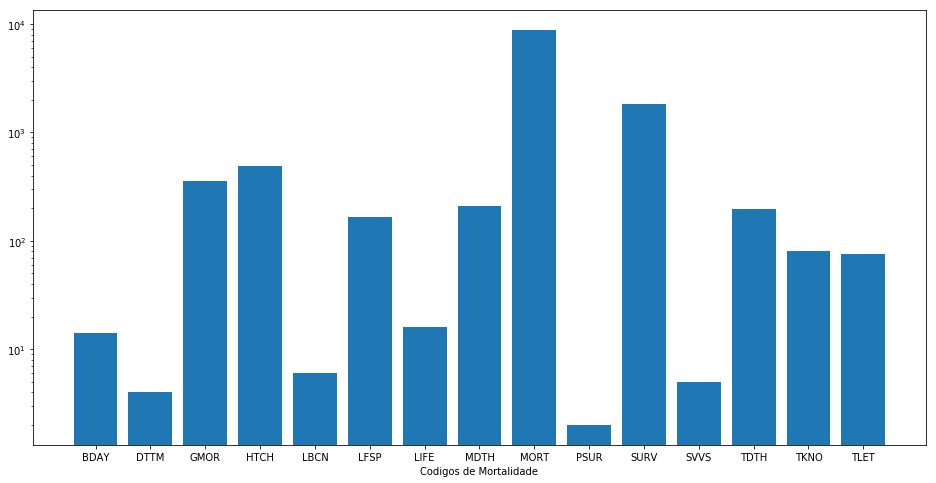

In [13]:
fig = plt.figure(figsize = (16,8))
plt.bar(x, y, log=True)
plt.xlabel("Codigos de Mortalidade")
fig.show()